In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix, plot_roc_curve, plot_precision_recall_curve
from sklearn.metrics import precision_score, recall_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import cross_val_score
import seaborn as sns
import matplotlib.pyplot as plt
from pprint import pprint



In [2]:
data = pd.read_csv(r"C:\Users\federico\Documents\Python lending club\LendingClub.csv")
#data = pd.read_csv(r"C:\Users\federico\Desktop\Markovitz\credit_scoring_v1\LendingClub.csv")
#cols = ['loan_amnt', 'term',  'funded_amnt',  'annual_inc', 'dti', 'delinq_2yrs', 'last_pymnt_amnt', 'emp_length','tax_liens']
cols = ['loan_amnt', 'term', 'int_rate', 'funded_amnt', 'grade', 'annual_inc', 'dti', 'hardship_loan_status', 'delinq_2yrs', 'last_pymnt_amnt', 'emp_length','loan_status','home_ownership','tax_liens']
data = data[cols]
data = data.drop(['hardship_loan_status'], axis=1)
data =data.dropna()
data=data[(data["loan_status"]=="Fully Paid") | (data['loan_status'] == 'Charged Off')]
binary={"Fully Paid":0, "Charged Off":1}
data["defaulted"]=data.loan_status.map(binary)
data=data.drop("loan_status",axis=1)
emp_map={'7 years':7, '4 years':4, '1 year':1, '3 years':3, '< 1 year':0, '6 years':6,
'5 years':5, '2 years':2, '10+ years':10, '9 years':9, '8 years':8}
data.emp_length=data.emp_length.map(emp_map)
grade_map={'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}
data.grade=data.grade.map(grade_map)
     
data.term = pd.to_numeric(data.term.str.slice(1,3))
home_map={'MORTGAGE':1, 'RENT':2, 'OWN':3, 'ANY':4, 'OTHER':5, 'NONE':6}
data.home_ownership=data.home_ownership.map(home_map)
print(data)
print(data.info)
print(data.describe())
print(data.defaulted.value_counts())

        loan_amnt  term  int_rate  funded_amnt  grade  annual_inc    dti  \
0            4750    36     17.86         4750      4     35000.0  34.79   
3           12000    36      9.99        12000      2     60000.0  12.84   
5           16000    60     15.99        16000      4    101000.0  19.90   
7           15000    36     14.49        15000      3     38000.0  29.19   
10          15000    36     14.33        15000      3     85000.0  17.22   
...           ...   ...       ...          ...    ...         ...    ...   
249993       6100    36      6.03         6100      1     80000.0   1.14   
249994       3600    36     16.02         3600      3     70000.0  20.52   
249995      20700    36      7.89        20700      1     45000.0  21.60   
249997      20000    36     13.68        20000      3    150000.0  10.68   
249998      28000    60      9.17        28000      2    107000.0  27.75   

        delinq_2yrs  last_pymnt_amnt  emp_length  home_ownership  tax_liens  \
0       

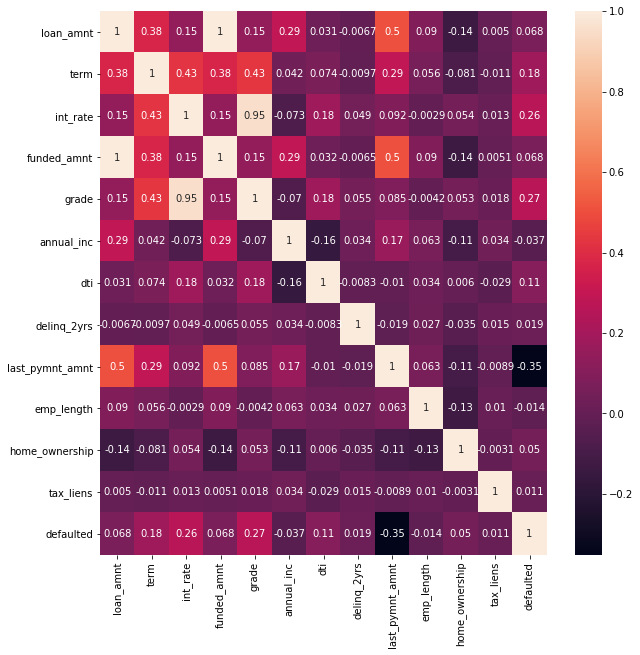

In [4]:
corr_mtx = data.corr()
        
plt.figure(figsize = (10,10))

sns.heatmap(corr_mtx, xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True)
plt.show()

In [5]:
def split(df):
        x=df.iloc[:,0:11]
        y=df.iloc[:,12]
        #y = df.type
        #x = df.drop(columns=['type'])
        x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
        return x_train, x_test, y_train, y_test

In [6]:
x_train, x_test, y_train, y_test = split(data)

In [11]:
#####Logisti regression  Base Model





In [12]:
logistic_regression= LogisticRegression(C=22,solver="liblinear")

In [13]:
logistic_regression.fit( x_train, y_train)

LogisticRegression(C=22, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [14]:
y_pred=logistic_regression.predict(x_test)

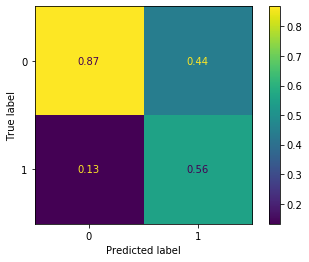

In [15]:
#confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])

plot_confusion_matrix(logistic_regression, x_test, y_test,normalize="pred")
#sns.heatmap(confusion_matrix, annot=True)

In [16]:
accuracy = logistic_regression.score(x_test, y_test)
accuracy

0.8187239995582226

In [17]:
#####logistic regression Best parameters, Best Model for Penalized Logistic Regression 

In [18]:
#Inproving the model witg Cv
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
penalty = ['l1', 'l2'] 
features = [ "newton-cg", "lbfgs", "liblinear", "sag", "saga"] 
# Maximum number of levels in tree
c = [int(x) for x in np.linspace(0, 110, num = 11)]
c.append(None)
# Minimum number of samples required to split a node
# Minimum number of samples required at each leaf node
# Method of selecting samples for training each tree
max_iter = [int(x) for x in np.linspace(100, 500, num = 10)]


In [14]:
random_grid = {
               'C': c,
               'penalty': penalty,
               'solver': features,
               'max_iter': max_iter,
               }
pprint(random_grid)

{'C': [0, 11, 22, 33, 44, 55, 66, 77, 88, 99, 110, None],
 'max_iter': [100, 144, 188, 233, 277, 322, 366, 411, 455, 500],
 'penalty': ['l1', 'l2'],
 'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']}


In [15]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
lr=LogisticRegression()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
lr_random = RandomizedSearchCV(estimator = lr, param_distributions = random_grid, n_iter = 20, cv = 5, verbose=2, random_state=42, n_jobs = -1,error_score=0)
# Fit the random search model
lr_random.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   36.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  2.6min finished
C:\Users\federico\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\federico\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\federico\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\federico\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn(

RandomizedSearchCV(cv=5, error_score=0,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=20, n_jobs=-1,
                   param_distributions={'C': [0, 11, 22, 33, 44, 55, 66, 77, 88,
                                              99, 110, None],
                                        'max_iter': [100, 144, 188, 233, 277,
                                                     322, 366, 4

In [16]:
lr_random.best_params_

{'solver': 'newton-cg', 'penalty': 'l2', 'max_iter': 366, 'C': 77}

In [17]:
#copy and paste new params


modelbest=LogisticRegression(solver= 'newton-cg', penalty= 'l2', max_iter= 366, C= 77)
modelbest.fit(x_train, y_train)

C:\Users\federico\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\federico\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\federico\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\federico\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:314: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\federico\anaconda3\lib\site-packages\scipy\optimize\linesearch.py:466: LineSearchWarning: The line search algorithm did not converge
  

LogisticRegression(C=77, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=366,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [18]:
accuracy = logistic_regression.score(x_test, y_test)
print("old model",accuracy)

old model 0.8187239995582226


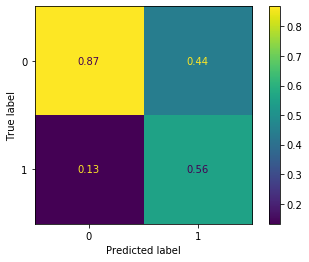

In [19]:
plot_confusion_matrix(logistic_regression, x_test, y_test,normalize="pred")


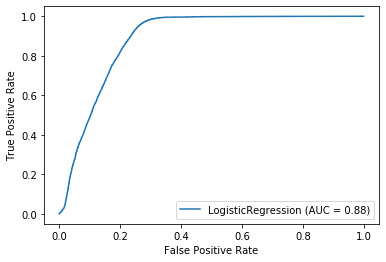

In [20]:
plot_roc_curve(logistic_regression, x_test, y_test)

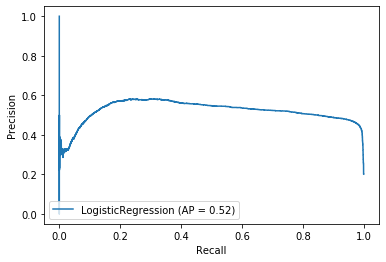

In [21]:
plot_precision_recall_curve(logistic_regression, x_test, y_test)

In [22]:
accuracy = modelbest.score(x_test, y_test)
print("accuracy best model",accuracy)

accuracy best model 0.8652947023524648


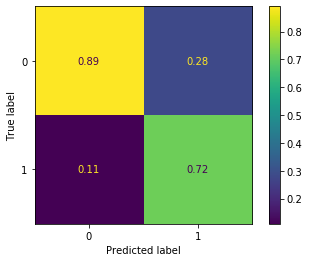

In [23]:
plot_confusion_matrix(modelbest, x_test, y_test,normalize="pred")


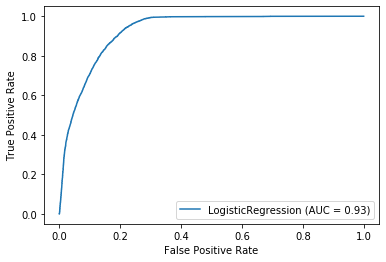

In [24]:
plot_roc_curve(modelbest, x_test, y_test)

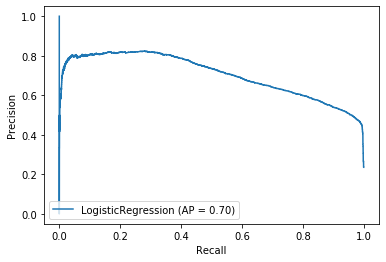

In [25]:
plot_precision_recall_curve(modelbest, x_test, y_test)

##### Random Forest 

In [7]:
from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier(random_state = 42,n_estimators=1)
from pprint import pprint
# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(randomforest.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 1,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}


In [8]:
randomforest.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [9]:
y_pred=randomforest.predict(x_test)

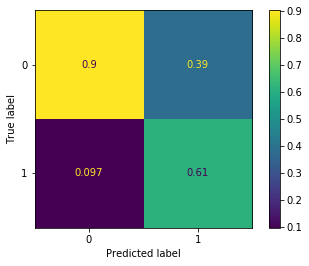

In [10]:
plot_confusion_matrix(randomforest, x_test, y_test,normalize="pred")


In [11]:
accuracy = randomforest.score(x_test, y_test)
accuracy

0.8461878290321393

In [12]:
#####Random forest Best parameters, Best Model for Random forest classifier

In [13]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
n_estimators=[int(x) for x in np.linspace(10, 500, num = 10)]
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 100, num = 10)]
max_depth.append(None)
# Minimum number of samples required to split a node
#min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
#min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [15]:
# Create the random grid
random_grid = {"n_estimators":n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               #'min_samples_split': min_samples_split,
               #'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
pprint(random_grid)

{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'n_estimators': [10, 64, 118, 173, 227, 282, 336, 391, 445, 500]}


In [16]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,n_iter = 1, cv = 5, verbose=2, random_state=42, n_jobs = -1,error_score=0)
# Fit the random search model
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:   41.5s remaining:  1.0min
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   41.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:   41.9s finished


RandomizedSearchCV(cv=5, error_score=0,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                 

In [17]:
rf_random.best_params_

{'n_estimators': 118,
 'max_features': 'auto',
 'max_depth': 60,
 'bootstrap': True}

In [19]:
#copy and paste new params


modelbest=RandomForestClassifier(n_estimators= 118,
 max_features= 'auto',
 max_depth= 60,
 bootstrap= True)
modelbest.fit(x_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=60, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=118,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [20]:
accuracy = randomforest.score(x_test, y_test)
print("old model",accuracy)

old model 0.8461878290321393


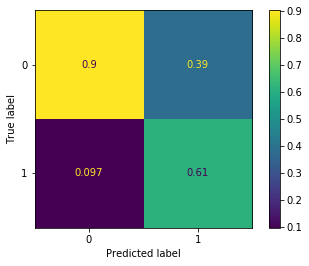

In [21]:
plot_confusion_matrix(randomforest, x_test, y_test,normalize="pred")


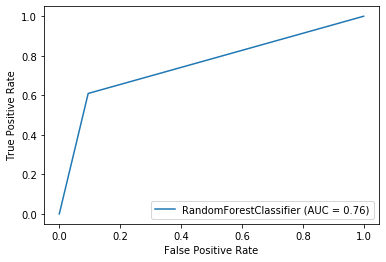

In [22]:
plot_roc_curve(randomforest, x_test, y_test)

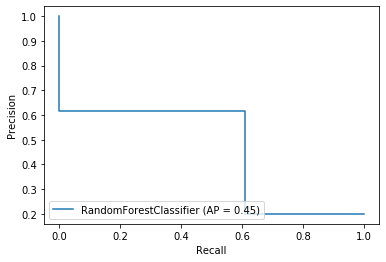

In [23]:
plot_precision_recall_curve(randomforest, x_test, y_test)

In [24]:
accuracy = modelbest.score(x_test, y_test)
print("accuracy best model",accuracy)

accuracy best model 0.8934948275227331


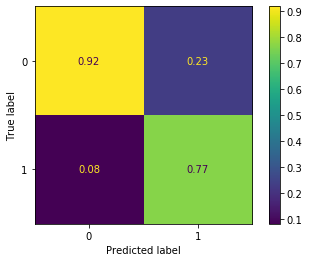

In [25]:
plot_confusion_matrix(modelbest, x_test, y_test,normalize="pred")


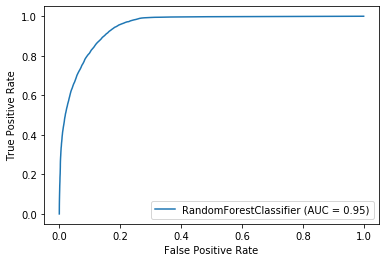

In [26]:
plot_roc_curve(modelbest, x_test, y_test)

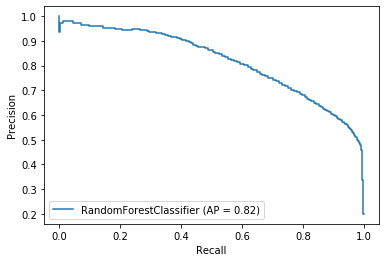

In [27]:
plot_precision_recall_curve(modelbest, x_test, y_test)

####Linear Discriminant analysis

In [6]:
###### Linear Discriminant analysis 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [7]:
lineardiscriminantanalysis = LinearDiscriminantAnalysis(solver="eigen",shrinkage=0.01,n_components=3)
from pprint import pprint
# Look at parameters 
print('Parameters currently in use:\n')
pprint(lineardiscriminantanalysis.get_params())

Parameters currently in use:

{'n_components': 3,
 'priors': None,
 'shrinkage': 0.01,
 'solver': 'eigen',
 'store_covariance': False,
 'tol': 0.0001}


In [8]:
lineardiscriminantanalysis.fit(x_train, y_train)

C:\Users\federico\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(11, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\federico\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


LinearDiscriminantAnalysis(n_components=3, priors=None, shrinkage=0.01,
                           solver='eigen', store_covariance=False, tol=0.0001)

In [9]:
y_pred=lineardiscriminantanalysis.predict(x_test)

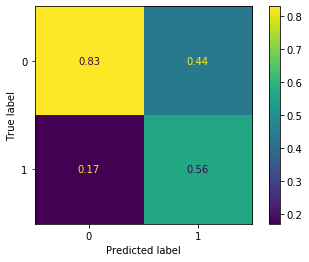

In [10]:
plot_confusion_matrix(lineardiscriminantanalysis, x_test, y_test,normalize="pred")


In [11]:
accuracy = lineardiscriminantanalysis.score(x_test, y_test)
accuracy

0.8105143025439017

In [12]:
#####Lda parameters, Best Model for Lda

In [34]:
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
#n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
solver=["lsqr", "eigen"]
shrinkage=[int(x) for x in np.linspace(0, 100, num = 10)]
n_components=[int(x) for x in np.linspace(1, 7, num = 7)]




In [35]:
# Create the random grid
random_grid = {"solver":solver,
               'shrinkage': shrinkage,
              
               'n_components': n_components}
pprint(random_grid)

{'n_components': [1, 2, 3, 4, 5, 6, 7],
 'shrinkage': [0, 11, 22, 33, 44, 55, 66, 77, 88, 100],
 'solver': ['lsqr', 'eigen']}


In [36]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
lda = LinearDiscriminantAnalysis()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
lda_random = RandomizedSearchCV(estimator = lda, param_distributions = random_grid,n_iter = 20, cv = 5, verbose=2, random_state=42, n_jobs = -1,error_score=0)
# Fit the random search model
lda_random.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   45.1s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  1.3min finished
C:\Users\federico\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(11, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\federico\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


RandomizedSearchCV(cv=5, error_score=0,
                   estimator=LinearDiscriminantAnalysis(n_components=None,
                                                        priors=None,
                                                        shrinkage=None,
                                                        solver='svd',
                                                        store_covariance=False,
                                                        tol=0.0001),
                   iid='deprecated', n_iter=20, n_jobs=-1,
                   param_distributions={'n_components': [1, 2, 3, 4, 5, 6, 7],
                                        'shrinkage': [0, 11, 22, 33, 44, 55, 66,
                                                      77, 88, 100],
                                        'solver': ['lsqr', 'eigen']},
                   pre_dispatch='2*n_jobs', random_state=42, refit=True,
                   return_train_score=False, scoring=None, verbose=2)

In [37]:
lda_random.best_params_

{'solver': 'eigen', 'shrinkage': 0, 'n_components': 5}

In [48]:
#copy and paste new params


modelbest=LinearDiscriminantAnalysis(solver = 'eigen', shrinkage= 0, n_components= 5)
modelbest.fit(x_train,y_train)

C:\Users\federico\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:463: ChangedBehaviorWarning: n_components cannot be larger than min(n_features, n_classes - 1). Using min(n_features, n_classes - 1) = min(11, 2 - 1) = 1 components.
  ChangedBehaviorWarning)
C:\Users\federico\anaconda3\lib\site-packages\sklearn\discriminant_analysis.py:469: FutureWarning: In version 0.23, setting n_components > min(n_features, n_classes - 1) will raise a ValueError. You should set n_components to None (default), or a value smaller or equal to min(n_features, n_classes - 1).
  warnings.warn(future_msg, FutureWarning)


LinearDiscriminantAnalysis(n_components=5, priors=None, shrinkage=0,
                           solver='eigen', store_covariance=False, tol=0.0001)

In [49]:
accuracy = lineardiscriminantanalysis.score(x_test, y_test)
print("old model",accuracy)

old model 0.8105143025439017


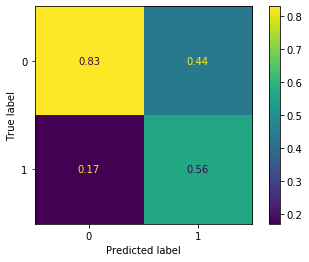

In [50]:
plot_confusion_matrix(lineardiscriminantanalysis, x_test, y_test,normalize="pred")


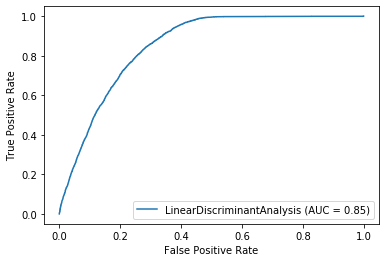

In [51]:
plot_roc_curve(lineardiscriminantanalysis, x_test, y_test)

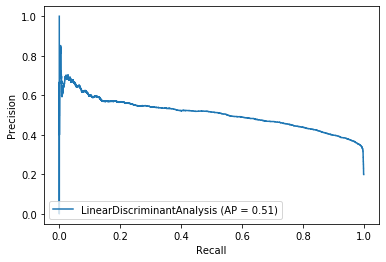

In [52]:
plot_precision_recall_curve(lineardiscriminantanalysis, x_test, y_test)

In [53]:
accuracy = modelbest.score(x_test, y_test)
print("accuracy best model",accuracy)

accuracy best model 0.8556124139454405


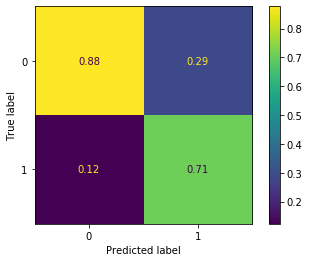

In [54]:
plot_confusion_matrix(modelbest, x_test, y_test,normalize="pred")


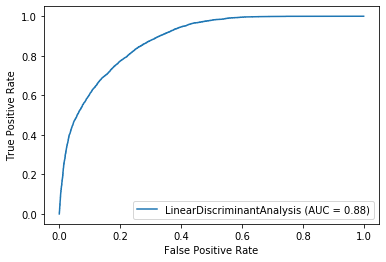

In [55]:
plot_roc_curve(modelbest, x_test, y_test)

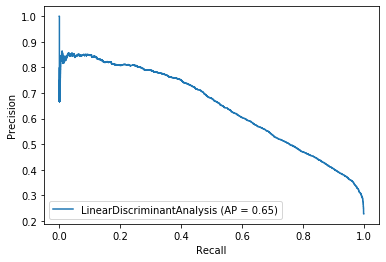

In [56]:
plot_precision_recall_curve(modelbest, x_test, y_test)

In [123]:
accuracy = model.score(x_test, y_test)
print( "accuracy base model",accuracy)

accuracy base model 0.8105143025439017


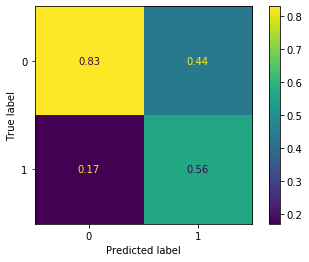

In [122]:
plot_confusion_matrix(model, x_test, y_test,normalize="pred")


In [19]:
######Neural networks
import tensorflow as tf


In [20]:
x_train, x_test, y_train, y_test

(        loan_amnt  term  int_rate  funded_amnt  grade  annual_inc    dti  \
 52213        2400    36     19.20         2400      4     55000.0  19.35   
 154138      24000    36     15.31        24000      3    118000.0  24.92   
 219025       1200    36     23.99         1200      6     30000.0  36.16   
 115307      16000    60     12.39        16000      3     69000.0   7.70   
 25278        5950    36     17.14         5950      4     38000.0  19.17   
 ...           ...   ...       ...          ...    ...         ...    ...   
 77265       30000    60     10.99        19425      2    249996.0   1.34   
 179518      13725    60     20.99        13725      5     67000.0  17.03   
 176407      20000    36      9.17        20000      2     70000.0  24.17   
 216940      15000    36      8.90        15000      1     90000.0  10.03   
 80181        1500    36     13.67         1500      3     60000.0  20.86   
 
         delinq_2yrs  last_pymnt_amnt  emp_length  home_ownership  
 52213

In [21]:
x_train.shape

(108652, 11)

In [22]:
x_train= np.reshape(x_train, (108652,11))

In [23]:
y_train.shape

(108652,)

In [24]:
y_train= np.reshape(y_train, ( 108652,))

In [25]:
y_train.shape

(108652,)

In [26]:
#x_train= x_train/255
#x_test=x_test/255

In [27]:

# first neural network with keras tutorial
from numpy import loadtxt
from keras.models import Sequential
from keras.layers import Dense

model = Sequential()
model.add(Dense(12, input_dim=11, activation='sigmoid'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))




# compile the keras model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# fit the keras model on the dataset
model.fit(x_train, y_train, epochs=10, batch_size=5)
# evaluate the keras model
accuracy = model.evaluate(x_train, y_train)


Epoch 1/10
21731/21731 [==============================] - 28s 1ms/step - loss: 0.4671 - accuracy: 0.8049
Epoch 2/10
21731/21731 [==============================] - 31s 1ms/step - loss: 0.4888 - accuracy: 0.8057
Epoch 3/10
21731/21731 [==============================] - 29s 1ms/step - loss: 0.4966 - accuracy: 0.8032
Epoch 4/10
21731/21731 [==============================] - 30s 1ms/step - loss: 0.4965 - accuracy: 0.8032
Epoch 5/10
21731/21731 [==============================] - 26s 1ms/step - loss: 0.4964 - accuracy: 0.8032
Epoch 6/10
21731/21731 [==============================] - 26s 1ms/step - loss: 0.4964 - accuracy: 0.8032
Epoch 7/10
21731/21731 [==============================] - 25s 1ms/step - loss: 0.4964 - accuracy: 0.8032
Epoch 8/10
21731/21731 [==============================] - 26s 1ms/step - loss: 0.4964 - accuracy: 0.8032
Epoch 9/10
21731/21731 [==============================] - 25s 1ms/step - loss: 0.4963 - accuracy: 0.8032
Epoch 10/10
3396/3396 [==============================] 

In [28]:
print('Accuracy: %.2f' ,(accuracy[1]))
print("loss",accuracy[0])


Accuracy: %.2f 0.803215742111206
loss 0.4960672855377197


In [29]:
predictions=np.argmax(model.predict(x_test), axis=-1)

In [30]:
predictions

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [31]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test, predictions)
print('AUC: %.2f' % auc)

AUC: 0.50


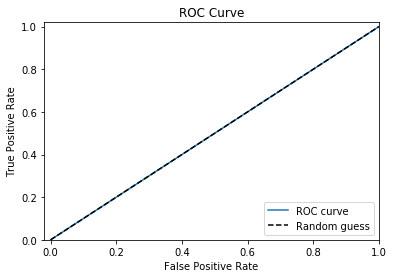

In [32]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
%matplotlib inline
#y_test=true value of y 
#probs=predicted value of y

fpr, tpr, thresholds = roc_curve(y_test, predictions)
# create plot
plt.plot(fpr, tpr, label='ROC curve')
plt.plot([0, 1], [0, 1], 'k--', label='Random guess')
_ = plt.xlabel('False Positive Rate')
_ = plt.ylabel('True Positive Rate')
_ = plt.title('ROC Curve')
_ = plt.xlim([-0.02, 1])
_ = plt.ylim([0, 1.02])
_ = plt.legend(loc="lower right")


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      1.00      0.89     21753
           1       0.00      0.00      0.00      5410

    accuracy                           0.80     27163
   macro avg       0.40      0.50      0.44     27163
weighted avg       0.64      0.80      0.71     27163



C:\Users\federico\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [34]:
accuracy = model.evaluate(x_train, y_train)


3396/3396 [==============================] - 3s 851us/step - loss: 0.4961 - accuracy: 0.8032


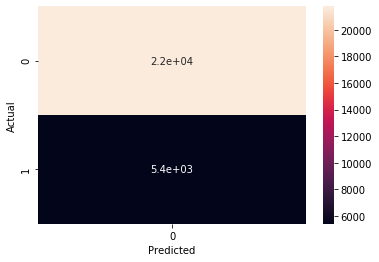

In [37]:
confusion_matrix = pd.crosstab(y_test, predictions, rownames=['Actual'], colnames=['Predicted'])


sns.heatmap(confusion_matrix,annot=True)